In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import os

### Reading the data

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [5]:
df.shape

(2823, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,10268.204082,33.986395,84.138639,6.673469,3446.003537,2.673469,6.986395,2003.863946,100.632653
std,106.742036,9.740458,19.897255,3.830596,1717.988835,1.171367,3.734303,0.746127,40.046562
min,10120.000000,15.000000,26.880000,1.000000,652.350000,1.000000,1.000000,2003.000000,33.000000
25%,10148.000000,26.000000,66.390000,3.000000,2249.005000,2.000000,4.000000,2003.000000,70.000000
50%,10270.000000,33.000000,98.050000,6.000000,3160.740000,3.000000,7.000000,2004.000000,99.000000
75%,10361.000000,41.000000,100.000000,10.000000,4410.060000,4.000000,11.000000,2004.000000,121.000000
max,10420.000000,66.000000,100.000000,15.000000,9774.030000,4.000000,12.000000,2005.000000,214.000000


### Order Quantity Distribution

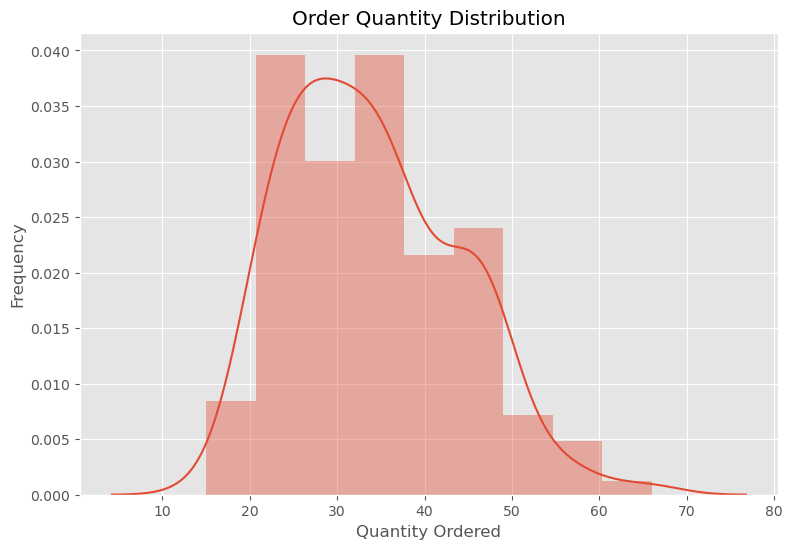

In [10]:
plt.figure(figsize=(9,6))
sns.distplot(df['QUANTITYORDERED'])
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

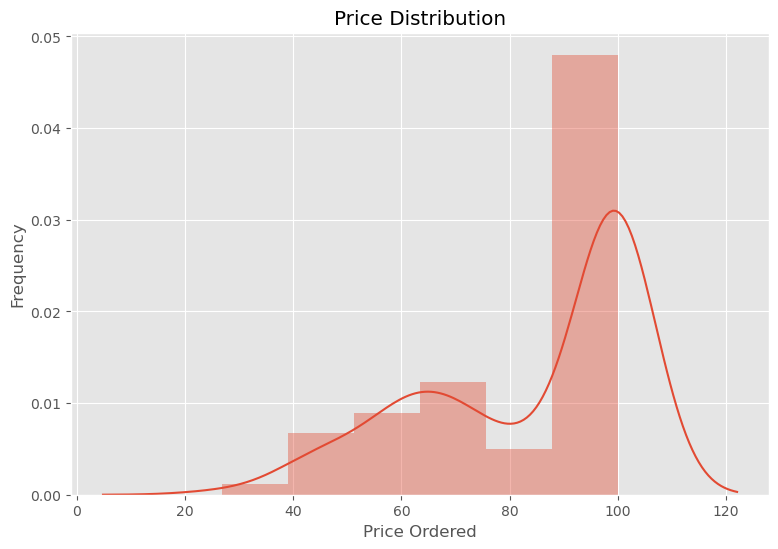

In [11]:
plt.figure(figsize=(9,6))
sns.distplot(df['PRICEEACH'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

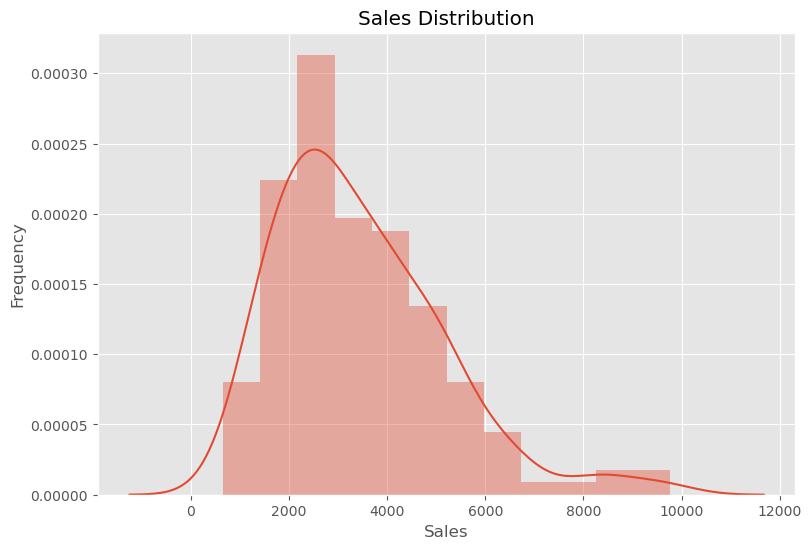

In [12]:
plt.figure(figsize=(9,6))
sns.distplot(df['SALES'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### Analyzing the STATUS variable

In [13]:
df['STATUS'].value_counts(normalize = True)

STATUS
Shipped       0.911565
In Process    0.088435
Name: proportion, dtype: float64

### Checking the time range of the data

In [14]:
df.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    5
2004    4
2005    3
Name: MONTH_ID, dtype: int64

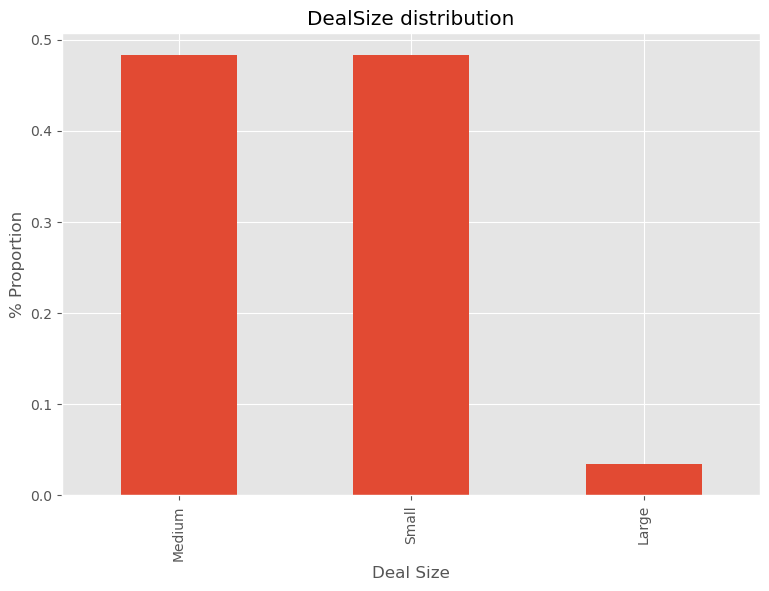

In [15]:
plt.figure(figsize=(9,6))
df['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

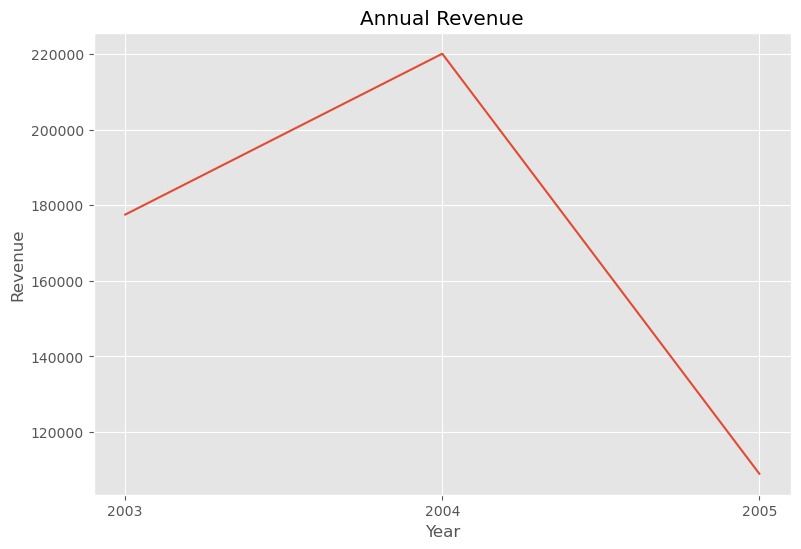

In [16]:
plt.figure(figsize=(9,6))
df.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003,2006,1))
plt.show()

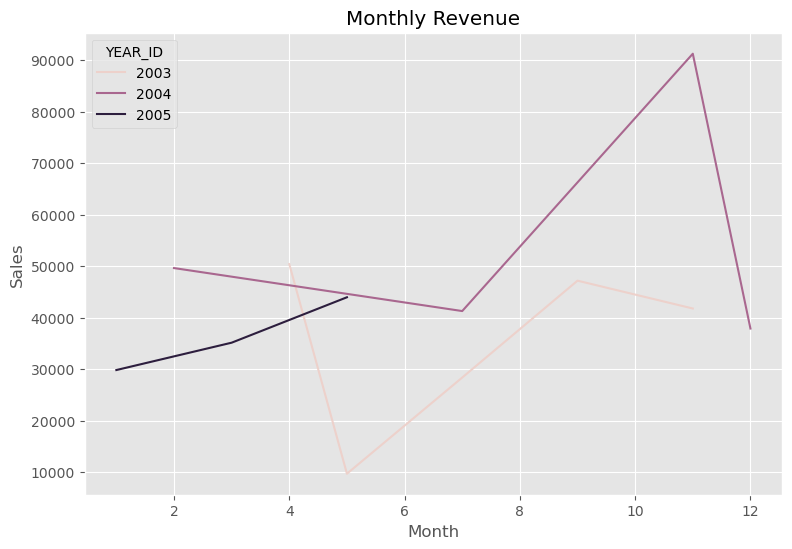

In [17]:
plt.figure(figsize=(9,6))

monthly_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

### Monthly Revenue Growth Rate:

In [18]:
monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()

In [19]:
monthly_revenue.head()

,YEAR_ID,MONTH_ID,SALES,MONTHLY GROWTH
0,2003,4,50397.66,NaN
1,2003,5,9738.18,-0.806773
2,2003,7,28397.26,1.916075
3,2003,9,47191.76,0.661842
4,2003,11,41791.95,-0.114423


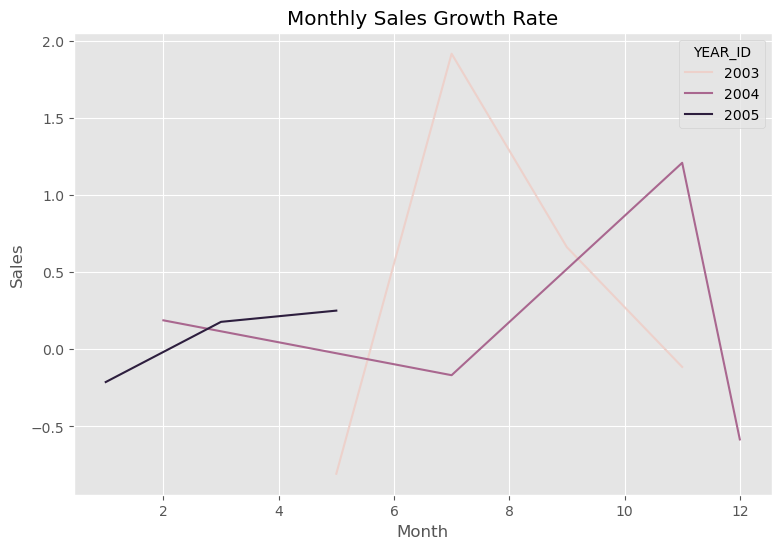

In [20]:
plt.figure(figsize=(9,6))
sns.lineplot(x="MONTH_ID", y="MONTHLY GROWTH",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')
plt.show()

### Top 10 countries by Sales

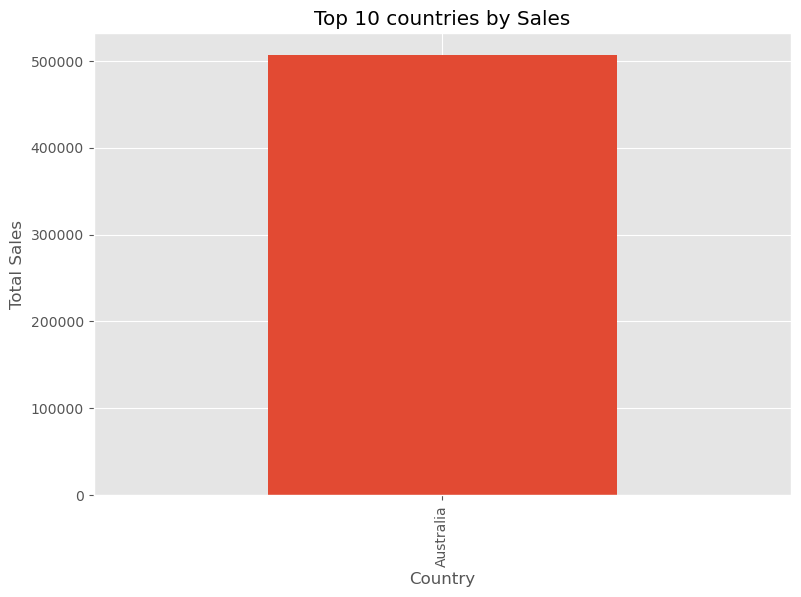

In [21]:
plt.figure(figsize=(9,6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

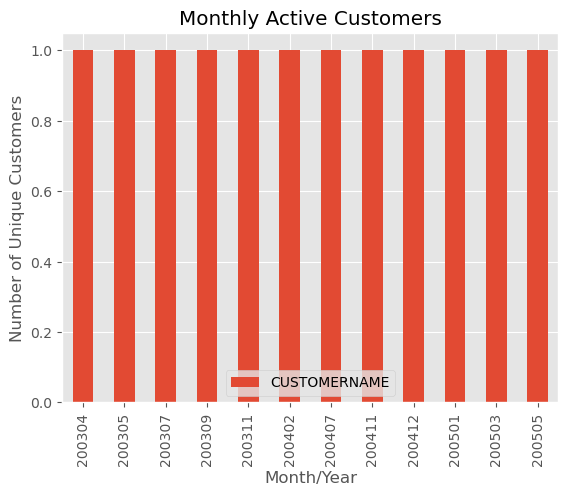

In [22]:
df['YEAR_MONTH'] = df['YEAR_ID'].map(str)+df['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))
monthly_active = df.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar',x='YEAR_MONTH',y='CUSTOMERNAME')
#plt.figure(figsize=(10,8))
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
#plt.figure(figsize=(10,8))
plt.show()

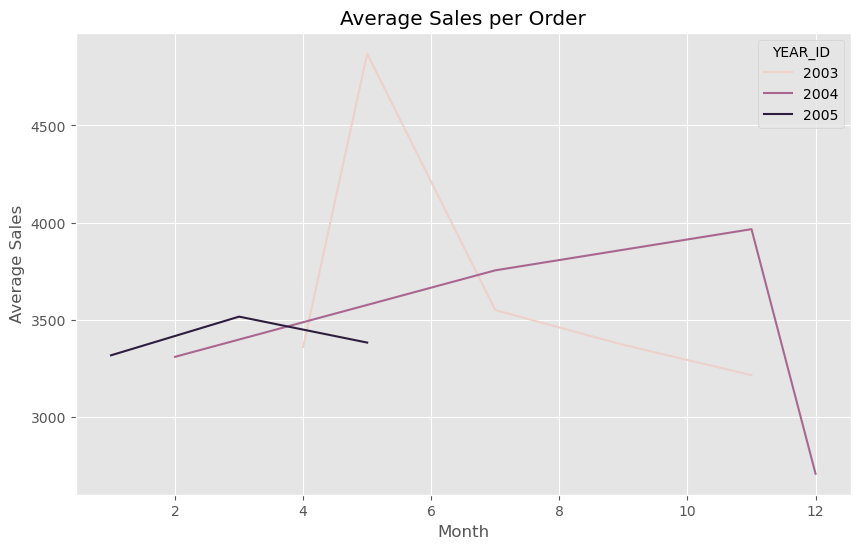

In [23]:
average_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=average_revenue)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Order')
plt.show()

### New Customers Growth Rate

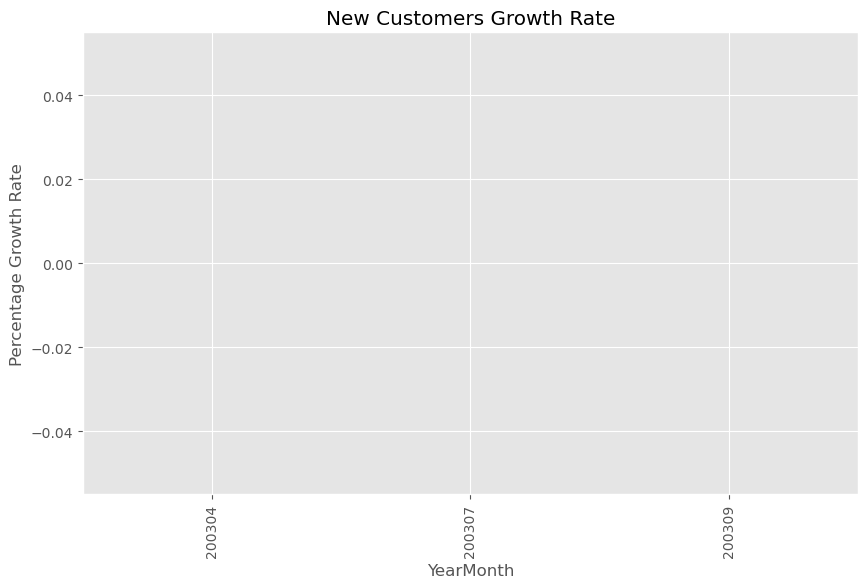

In [24]:
df_first_purchase = df.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()
df_first_purchase.columns = ['CUSTOMERNAME','FirstPurchaseDate']

plt.figure(figsize=(10,6))
df_first_purchase.groupby(['FirstPurchaseDate'])['CUSTOMERNAME'].nunique().pct_change().plot(kind='bar')
plt.title('New Customers Growth Rate')
plt.xlabel('YearMonth')
plt.ylabel('Percentage Growth Rate')
plt.show()

In [25]:
x= df.drop(columns= ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'])
y = df['ORDERNUMBER']
print(x)
print(y)

      ORDERNUMBER   PRODUCTLINE  MSRP PRODUCTCODE                CUSTOMERNAME  \
10          10223   Motorcycles    95    S10_1678  Australian Collectors, Co.   
21          10361   Motorcycles    95    S10_1678   Souveniers And Things Co.   
40          10270  Classic Cars   214    S10_1949   Souveniers And Things Co.   
47          10347  Classic Cars   214    S10_1949  Australian Collectors, Co.   
51          10391  Classic Cars   214    S10_1949     Anna's Decorations, Ltd   
...           ...           ...   ...         ...                         ...   
2667        10120        Planes    80   S700_3167  Australian Collectors, Co.   
2673        10223        Planes    80   S700_3167  Australian Collectors, Co.   
2685        10361        Planes    80   S700_3167   Souveniers And Things Co.   
2764        10361        Planes    74   S700_4002   Souveniers And Things Co.   
2791        10361        Planes    49    S72_1253   Souveniers And Things Co.   

                PHONE YEAR_

In [26]:
df.dropna(inplace=True)

<Axes: >

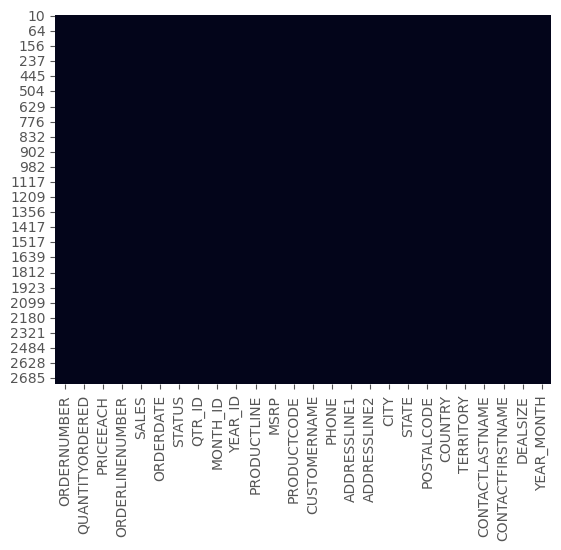

In [27]:
sns.heatmap(df.isnull(), cbar = False)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.6, random_state = 42)
print(x.shape, X_train.shape, X_test.shape)

(147, 7) (58, 7) (89, 7)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [30]:
x_encoded = pd.get_dummies(x)
model = LogisticRegression()
model.fit(x_encoded, y)

LogisticRegression()

In [31]:
y_pred = model.predict(x_encoded)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [33]:
if len(y_test) == len(y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
else:
    print("The lengths of y_test and y_pred are different. Check your data splitting or prediction process.")


The lengths of y_test and y_pred are different. Check your data splitting or prediction process.
